## **1.discover our dataset:**

**Context**

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

- Content price price in US dollars (\$326--\$18,823)

- carat weight of the diamond (0.2--5.01)

- cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

- color diamond colour, from J (worst) to D (best)

- clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

- x length in mm (0--10.74)

- y width in mm (0--58.9)

- z depth in mm (0--31.8)

- depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

- table width of top of diamond relative to widest point (43--95)

# **First step: Exploratory Data Analysis – EDA :**

IMPORT LIBRARIES

In [100]:
#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

READING THE DATA

In [101]:
dataset=pd.read_csv("train.csv")

In [102]:
#split dataset
data, test_set = train_test_split(dataset, test_size=0.2, random_state=42)


## **Basic Data Exploration**

**1- head of the dataset**

In [103]:
data.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
21805,21806,1.55,Premium,J,VS1,62.6,59.0,8749,7.40,7.35,4.62
22939,22940,1.04,Premium,G,I1,62.2,58.0,2801,6.46,6.41,4.00
33888,33889,1.22,Premium,G,VS2,61.8,58.0,8362,6.91,6.84,4.25
35779,35780,0.51,Ideal,H,IF,62.6,56.0,1920,5.10,5.13,3.20
20589,20590,0.41,Ideal,E,SI1,62.1,54.0,969,4.81,4.76,2.97


**2-The shape of the dataset**

In [104]:
data.shape

(34521, 11)

**3-Info of the dataset & Know the datatypes**

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34521 entries, 21805 to 15795
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       34521 non-null  int64  
 1   carat    34521 non-null  float64
 2   cut      34521 non-null  object 
 3   color    34521 non-null  object 
 4   clarity  34521 non-null  object 
 5   depth    34521 non-null  float64
 6   table    34521 non-null  float64
 7   price    34521 non-null  int64  
 8   x        34521 non-null  float64
 9   y        34521 non-null  float64
 10  z        34521 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.2+ MB


**4-summary of the dataset**

In [106]:
data.describe()

,Id,carat,depth,table,price,x,y,z
count,34521.000000,34521.000000,34521.000000,34521.000000,34521.000000,34521.000000,34521.000000,34521.000000
mean,21621.709771,0.797798,61.751221,57.466418,3931.306480,5.729599,5.732268,3.537777
std,12444.427233,0.475239,1.435461,2.230899,3998.158239,1.124250,1.124616,0.713282
min,3.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,10846.000000,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,21637.000000,0.700000,61.800000,57.000000,2394.000000,5.690000,5.700000,3.520000
75%,32438.000000,1.040000,62.500000,59.000000,5302.000000,6.540000,6.540000,4.040000
max,43152.000000,5.010000,79.000000,95.000000,18803.000000,10.740000,31.800000,31.800000


## **Handling Missing value**

**1-Check number of missing value**

In [107]:
data.isnull().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

***Discussion:***
***
In this dataset there are no missing values ,so we can ignore the processing steps of missing data

## **Duplicate values**

In [108]:
Duplicate=data.duplicated().sum()
Duplicate

0

**Discussion:**
***
In this dataset there are no duplicated values ,so we can ignore the processing steps of duplicated data

## **Analysis Data and Visulization**

**1.Histograms for numerical attributes**

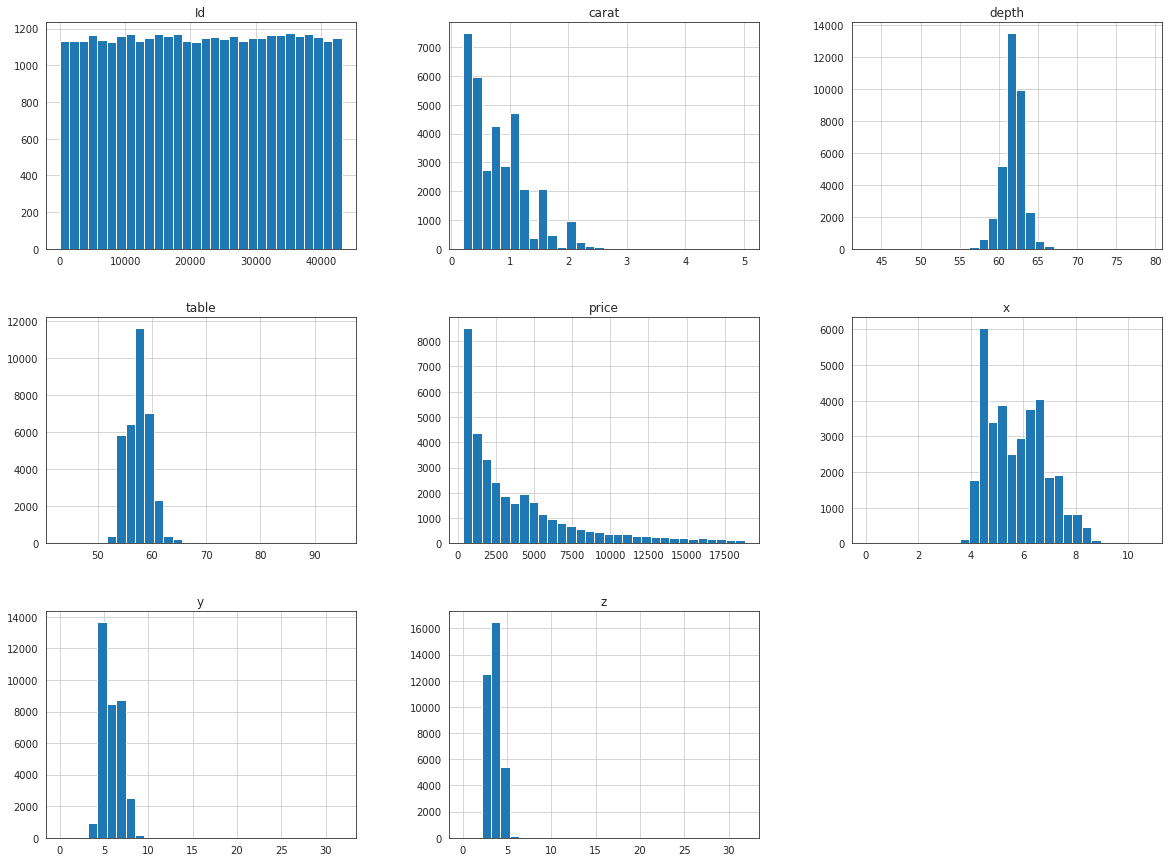

In [109]:
#Plot histogram for all for each numerical attribute 
data.hist(bins=30, figsize=(20,15))
plt.show()

**2.scatter matrix plots every numerical attribute**

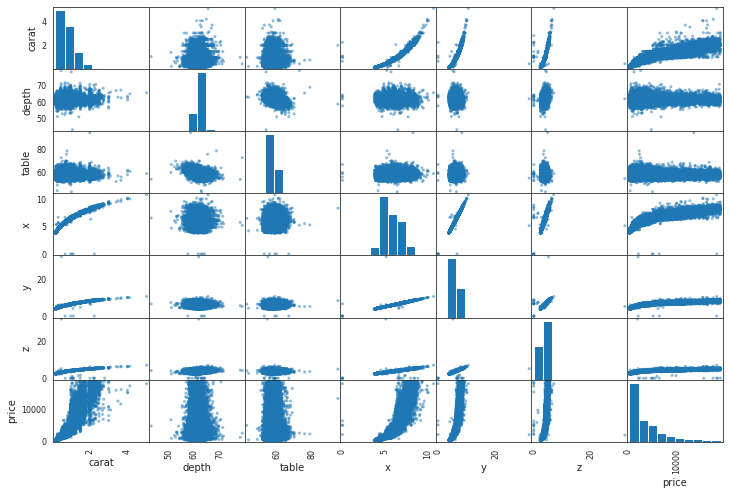

In [110]:
from pandas.plotting import scatter_matrix
attributes = ["carat","depth","table","x","y","z","price"]

scatter_matrix(data[attributes],figsize=(12, 8))

plt.show();

In [111]:
attributes = ["x", "depth", "table","carat","price"]

<Figure size 1008x1008 with 0 Axes>

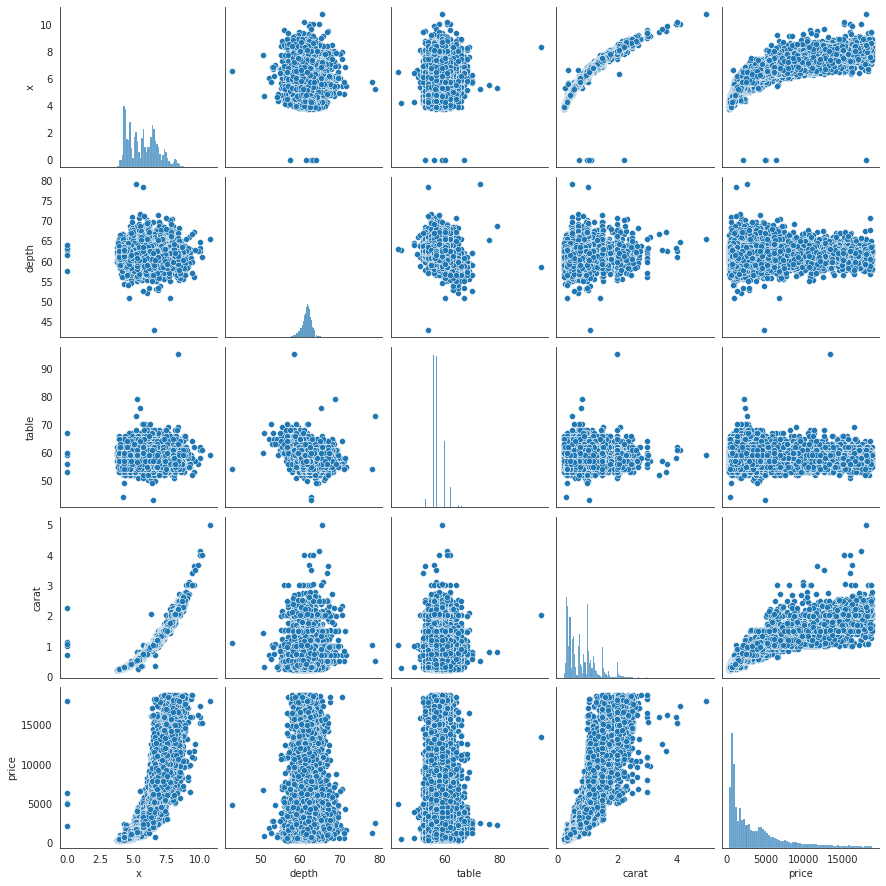

In [112]:
# CODE HERE
plt.figure(figsize=(14, 14))
df = data[attributes]
sns.pairplot(df)
plt.show();

**3.look for correlations among the features**

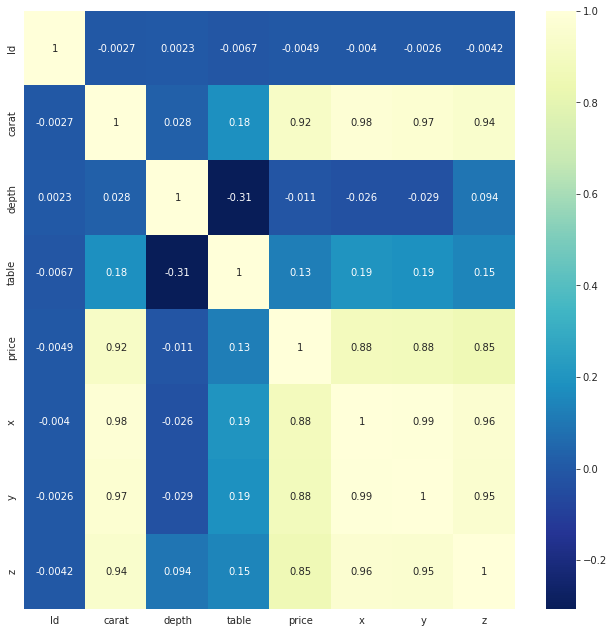

In [113]:
# CODE HERE

plt.figure(figsize=(11, 11))
sns.heatmap(data.corr(),cmap="YlGnBu_r",annot=True)
plt.show()

In [114]:
corr_matrix = data.corr()
corr_matrix["price"].sort_values(ascending=False)

price    1.000000
carat    0.921341
x        0.884537
y        0.879284
z        0.852939
table    0.126465
Id      -0.004898
depth   -0.010972
Name: price, dtype: float64

***Discussion***:
***
From these plots and code , we can see that depth , table,  variables are not very important in price here, 
most important variables are x,y,z & carat ,and I think these  varibles have in them the information that I care about , 
and cut attribute has embading in it information about table and depth,
carat is the weight so it is related volume of diamonds

 **4.discover categorical values of columns**

**Notice:**
***
As we see when we discover the data by info function ,there are three columns have categorical values ,so we have to discover these columns

In [115]:
#cut column
data["cut"].value_counts()

Ideal        13691
Premium       8835
Very Good     7789
Good          3156
Fair          1050
Name: cut, dtype: int64

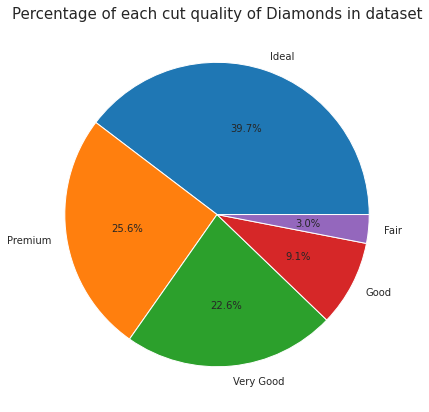

In [116]:

k=data["cut"]

#store the number of each cut quality 
Ideal=data[k=="Ideal"].shape[0]
Premium=data[k=="Premium"].shape[0]
Very_Good=data[k=="Very Good"].shape[0]
Good=data[k=="Good"].shape[0]
Fair=data[k=="Fair"].shape[0]

groups=[Ideal,Premium,Very_Good,Good,Fair]
labels=["Ideal","Premium","Very Good","Good","Fair"]

# Create a pieplot
plt.figure(figsize=(7,7))

plt.pie(x=groups, autopct="%.1f%%", labels=labels, pctdistance=0.6)
plt.title("Percentage of each cut quality of Diamonds in dataset", fontsize=15);
plt.show()

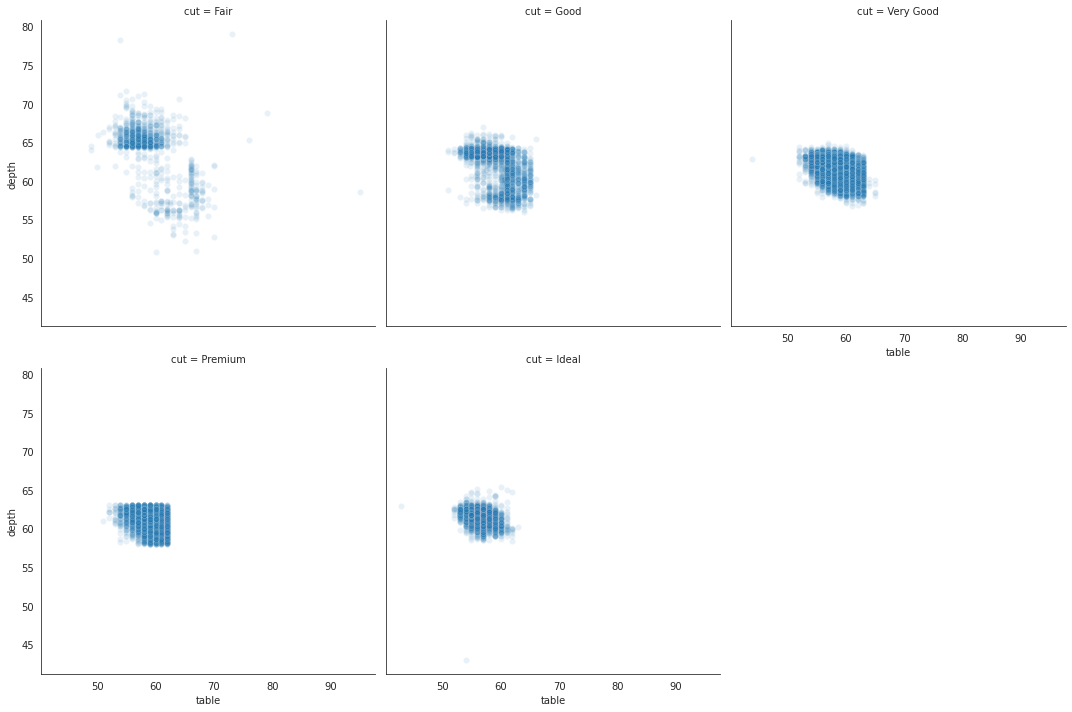

In [117]:

sns.relplot(x=data["table"],y=data["depth"],data=data,alpha=0.1,col="cut",\
            kind="scatter",col_wrap=3,col_order=["Fair", "Good", "Very Good", "Premium", "Ideal"])

plt.show()

***Discussion***:
***
we can see here cut attribute has standerd form for both table & depth ,so maybe we can ignore table & depth in our model 

In [118]:
#color column
data["color"].value_counts()

G    7216
E    6299
F    6093
H    5329
D    4350
I    3388
J    1846
Name: color, dtype: int64

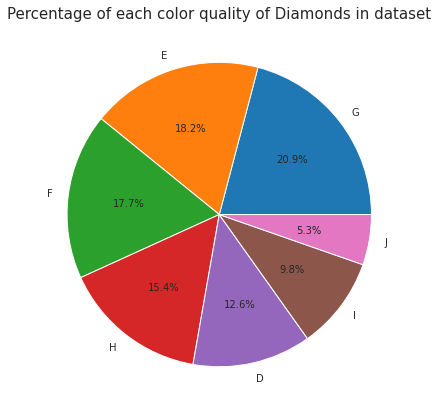

In [119]:

k1=data["color"]

#store the number of each color quality 
G=data[k1=="G"].shape[0]
E=data[k1=="E"].shape[0]
F=data[k1=="F"].shape[0]
H=data[k1=="H"].shape[0]
D=data[k1=="D"].shape[0]
I=data[k1=="I"].shape[0]
J=data[k1=="J"].shape[0]

groups1=[G,E,F,H,D,I,J]
labels1=["G","E","F","H","D","I","J"]

# Create a pieplot
plt.figure(figsize=(7,7))

plt.pie(x=groups1, autopct="%.1f%%", labels=labels1, pctdistance=0.6)
plt.title("Percentage of each color quality of Diamonds in dataset", fontsize=15);
plt.show()

In [120]:
#clarity column
yr=data["clarity"].value_counts()
yr

SI1     8312
VS2     7867
SI2     5978
VS1     5175
VVS2    3215
VVS1    2329
IF      1152
I1       493
Name: clarity, dtype: int64

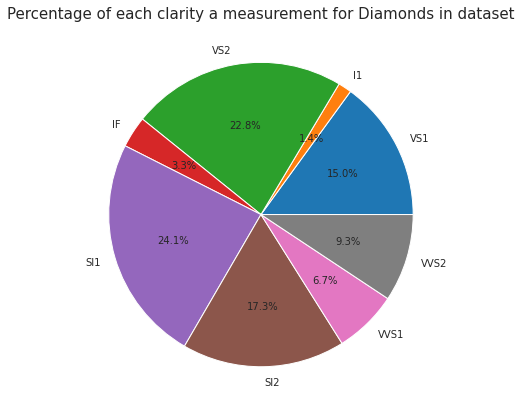

In [121]:
#extarct the information
data2=data["clarity"]
k3=data["clarity"].unique()

g=[ (k3[i],data[data2==k3[i]].shape[0])  for i in range(len(k3)) ]

labels2,groups2=zip(*g)

# Create a pieplot
plt.figure(figsize=(7,7))

plt.pie(x=groups2, autopct="%.1f%%", labels=labels2, pctdistance=0.6)
plt.title("Percentage of each clarity a measurement for Diamonds in dataset", fontsize=15);
plt.show()

**To know if there are any correlation between categorical attributs**

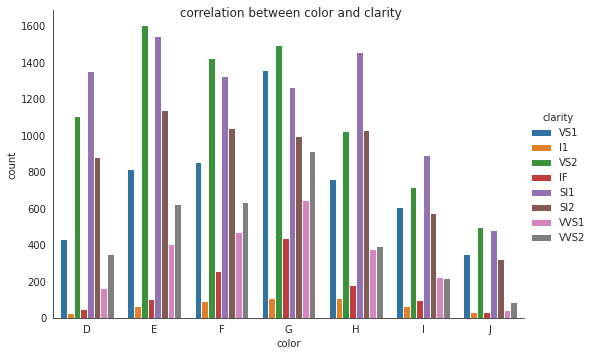

In [122]:
g=sns.catplot(x="color",kind="count",data=data,hue="clarity",aspect=1.5,order=["D","E","F","G","H","I","J"])
g.fig.suptitle("correlation between color and clarity")
plt.show();

In [123]:
# Cross tabulation between color clarity
CrosstabResult=pd.crosstab(index=data['clarity'],columns=data['color'])
print(CrosstabResult)

color       D     E     F     G     H    I    J
clarity                                        
I1         26    63    92   110   106   62   34
IF         46   105   259   436   181   95   30
SI1      1350  1544  1325  1266  1458  890  479
SI2       879  1141  1038   996  1030  573  321
VS1       430   817   851  1357   760  609  351
VS2      1106  1604  1425  1492  1025  715  500
VVS1      161   404   471   647   377  226   43
VVS2      352   621   632   912   392  218   88


In [124]:
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value greater than 0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 7.615338757559886e-264


**Discussion:**
***
we can see corelation between the G color and clarity ,the G color is more clarity  , and here I can not see any correaltion


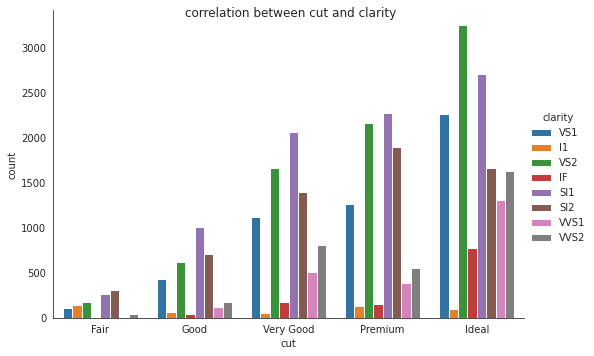

In [125]:
g=sns.catplot(x="cut",kind="count",data=data,hue="clarity",aspect=1.5,order=["Fair", "Good", "Very Good", "Premium", "Ideal"])
g.fig.suptitle("correlation between cut and clarity")
plt.show();

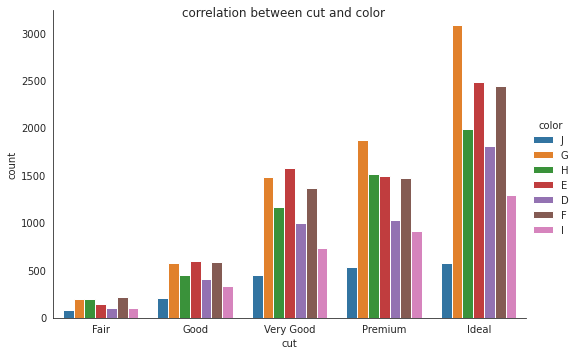

In [126]:
g=sns.catplot(x="cut",kind="count",data=data,hue="color",aspect=1.5,order=["Fair", "Good", "Very Good", "Premium", "Ideal"])
g.fig.suptitle("correlation between cut and color")
plt.show();

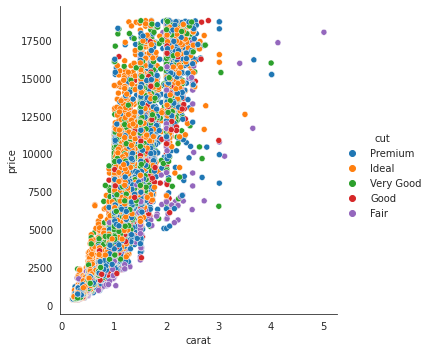

In [127]:

sns.relplot(y="price",x='carat',data=data,hue='cut',kind="scatter")

## **Descover outliers**

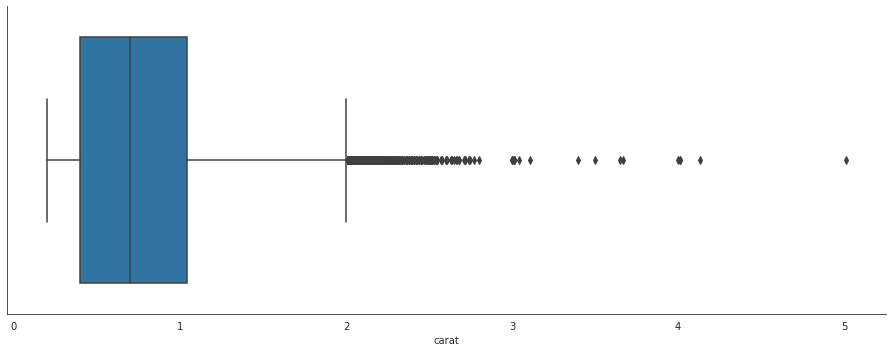

In [128]:
# CODE HERE
sns.set_style("white")
sns.catplot(x="carat",data=data,kind="box",aspect=20/8)
plt.show()

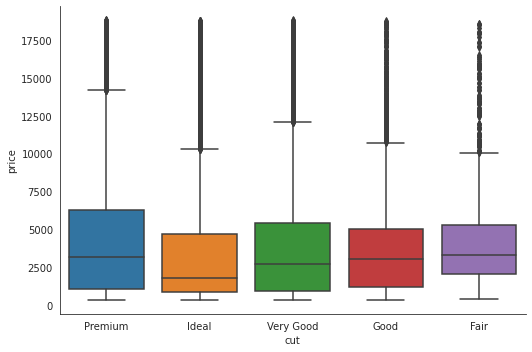

In [129]:
# CODE HERE
sns.set_style("white")
sns.catplot(x="cut",y="price",data=data,kind="box",aspect=12/8)
plt.show()

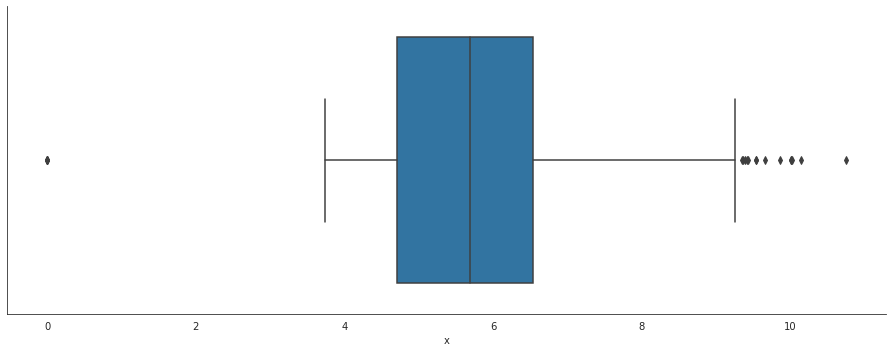

In [130]:
sns.set_style("white")
sns.catplot(x="x",data=data,kind="box",aspect=20/8)
plt.show()

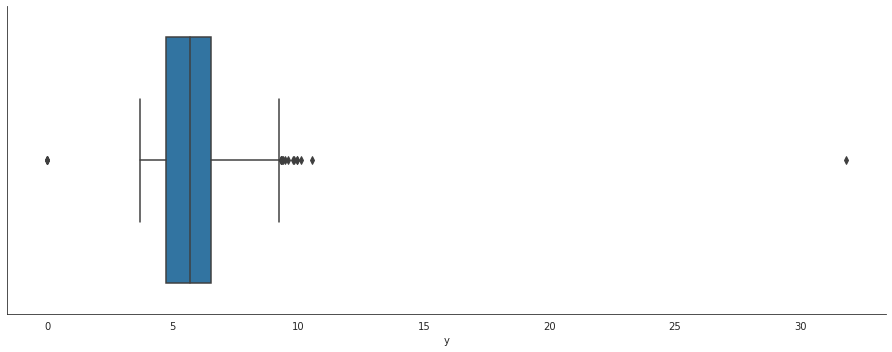

In [131]:
sns.set_style("white")
sns.catplot(x="y",data=data,kind="box",aspect=20/8)
plt.show()

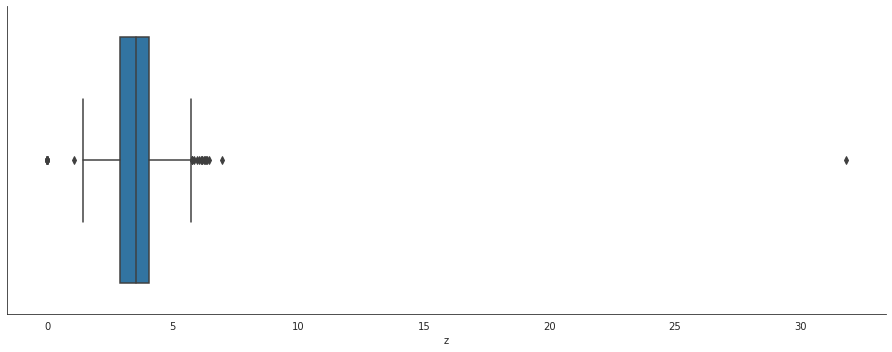

In [132]:
sns.set_style("white")
sns.catplot(x="z",data=data,kind="box",aspect=20/8)
plt.show()

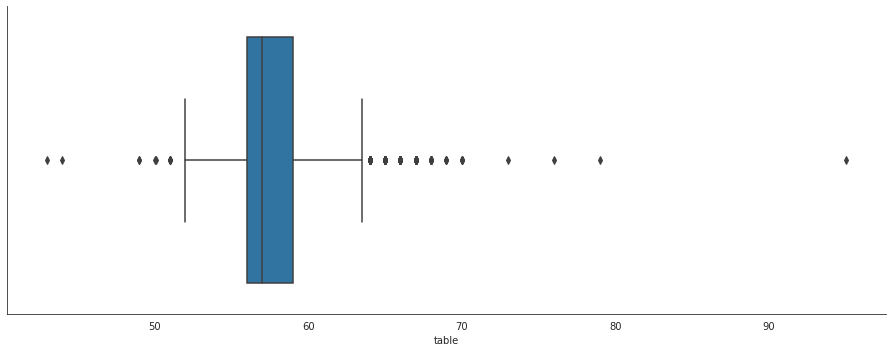

In [133]:
sns.set_style("white")
sns.catplot(x="table",data=data,kind="box",aspect=20/8)
plt.show()

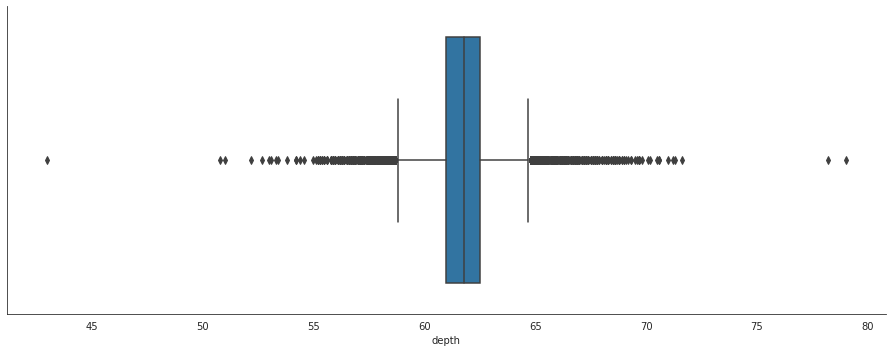

In [134]:
sns.set_style("white")
sns.catplot(x="depth",data=data,kind="box",aspect=20/8)
plt.show()

## **Prepare the Data for Machine Learning Algorithms**

## A- Data Cleaning

as we saw before that there is no null values and no duplicated too

**Check if there any zeros in dataframe.**

In [135]:
(data == 0).sum(axis=0)

Id          0
carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           5
y           4
z          14
dtype: int64

**Discussion:**
***
There are zeros values , and in x,y,z attributes the zeros values mean that they are null values because they are releated to the size of 
diamonds and the diamonds size is in 3D and it is not possible to have one of values 0

In [136]:
#replace with the mean values 
data["x"].replace(to_replace = 0, value = data["x"].mean(), inplace=True)
data["y"].replace(to_replace = 0, value = data["y"].mean(), inplace=True)
data["z"].replace(to_replace = 0, value = data["z"].mean(), inplace=True)

# data = data.drop(data[data["x"]==0].index)
# data = data.drop(data[data["y"]==0].index)
# data = data.drop(data[data["z"]==0].index)


In [137]:
(data == 0).sum(axis=0)

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

**Discussion:**
***
Here I try to drop or replace  zeros value with mean , and I find that replacing with mean is better


## B-Remove outliers

In [138]:
#function to handle outliers
def del_outlier(colo):
  global data
  Q1=data[colo].quantile(0.25)
  Q3=data[colo].quantile(0.75)
  mean_=data[colo].mean()
  IQR=Q3-Q1
  #idx=((data["x"] < (Q1_x-1.5*IQR))|(data["x"] > (Q3_x+1.5*IQR)))
  data=data.drop(data[data[colo] >(Q3+1.5*IQR) ].index)
  data=data.drop(data[data[colo] <(Q1-1.5*IQR) ].index)

In [139]:
#function to replace outliers
def replace_outlier(colo):
  global data
  Q1=data[colo].quantile(0.25)
  Q3=data[colo].quantile(0.75)
  mean_=data[colo].mean()
  IQR=Q3-Q1
  #idx=((data["x"] < (Q1_x-1.5*IQR))|(data["x"] > (Q3_x+1.5*IQR)))
  data[data[colo] >(Q3+2*IQR) ]=(Q3+2*IQR)
  data[data[colo] <(Q1-1.5*IQR) ]=(Q1-1.5*IQR)

In [140]:
# #we should remove outliers of numirecal attributes 
# #x-y-z-table-depth-carat

# columns_name=["x","y","z","table","depth","carat"]
# for col in columns_name :
#   del_outlier(col)

**Discussion:**
***
Here I try to drop or replace Outliers with high limit or low limit ,but it gives me worse results especially in Random forest algorithm ,I think that is because RF can handle outliers with itself and RF give as low variance at general, and when I do this step before with handling outliers it make it have lower variance and make algorithm with underfitting satuation


## C-Handling Text and Categorical Attributes

we notice before that we have three categorical attributes therefor we need to handle them

###**cut attribute**

We have 5 classes in **cut attribute**.

In [141]:
print(data["cut"].unique())

['Premium' 'Ideal' 'Very Good' 'Good' 'Fair']


In [142]:
data_cat = data[["cut"]]

In [143]:
#print(data_cat[:20])

In [144]:
#cut attribute
#here we will use OrdinalEncoder without one hotencoder because cut value  has rank
#and i pass non value category to start from 1
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[["non",'Fair',"Good",'Very Good','Premium','Ideal']])
data_cat_encoded = ordinal_encoder.fit_transform(data_cat)
#print(data_cat_encoded[:20])

### **color attribute**

In [145]:
print(data["color"].unique())

['J' 'G' 'H' 'E' 'D' 'F' 'I']


In [146]:
data_color = data[["color"]]
#print(data_color[:20])

In [147]:
#color attribute
#here we will use OrdinalEncoder without one hotencoder because  color value  has rank
#and i pass non value category to start from 1
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder1 = OrdinalEncoder(categories=[['nan','J','I','H','G','F','E','D']])
data_color_encoded = ordinal_encoder1.fit_transform(data_color)
#print(data_color_encoded[:20])

### **Clarity attribute**

In [148]:
print(data["clarity"].unique())

['VS1' 'I1' 'VS2' 'IF' 'SI1' 'SI2' 'VVS1' 'VVS2']


In [149]:
data_clarity = data[["clarity"]]
#print(data_clarity[:20])

In [150]:
#here we will use OrdinalEncoder without one hotencoder because  clarity value  has rank
#and i pass non value category to start from 1
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder2 = OrdinalEncoder(categories=[["nan","I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]])
data_clarity_encoded = ordinal_encoder2.fit_transform(data_clarity)
#print(data_clarity_encoded[:20])

This code bellow when I tried one hot encoding 

In [151]:
# #for categorical data
# one_hot1=pd.get_dummies(data2["cut"])
# one_hot2=pd.get_dummies(data2["color"])
# one_hot3=pd.get_dummies(data2["clarity"])
# #drop the categorical columns
# #Drop id column because it is not useful
# data2=data2.drop(["Id","cut","clarity","color"], axis=1)
# data2=data2.join(one_hot1)
# data2=data2.join(one_hot2)
# data2=data2.join(one_hot3)

**Discussion:**
***
Here I  chose to make this encoding for categorical features because when you gived me the dataset you also gived me infomation about rank of this columns, I tried to make onehotencoding and give me worse results ,and i tried to start encoding with 0 and give me worse result , so i chose to make ranked encoding with starting from one .

**Note:**
I see ranked encoding here dose not reprasent the qualtiy difference between elements , but it give me better results,so i chose it anyway



## C- Feature Scaling

In [152]:
data2=data
data2.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
21805,21806,1.55,Premium,J,VS1,62.6,59.0,8749,7.40,7.35,4.62
22939,22940,1.04,Premium,G,I1,62.2,58.0,2801,6.46,6.41,4.00
33888,33889,1.22,Premium,G,VS2,61.8,58.0,8362,6.91,6.84,4.25
35779,35780,0.51,Ideal,H,IF,62.6,56.0,1920,5.10,5.13,3.20
20589,20590,0.41,Ideal,E,SI1,62.1,54.0,969,4.81,4.76,2.97


In [153]:
#Add columns after encoding  them
data2["cut_num"]=data_cat_encoded
data2["color_num"]= data_color_encoded
data2["clarity_num"]= data_clarity_encoded


In [154]:
data2["x_y"]=data2["x"]/data2["y"]
data2["table_depth"]=data2["table"]/data2["depth"]

In [155]:
#drop the categorical columns and non importanat
data2 = data2.drop(["cut","clarity","color","depth","table","z","x","y"], axis=1)


In [156]:
data2.head()

,Id,carat,price,cut_num,color_num,clarity_num,x_y,table_depth
21805,21806,1.55,8749,4.0,1.0,5.0,1.006803,0.942492
22939,22940,1.04,2801,4.0,4.0,1.0,1.007800,0.932476
33888,33889,1.22,8362,4.0,4.0,4.0,1.010234,0.938511
35779,35780,0.51,1920,5.0,3.0,8.0,0.994152,0.894569
20589,20590,0.41,969,5.0,6.0,3.0,1.010504,0.869565


In [157]:
#Drop id column because it is not useful
data2 = data2.drop("Id", axis=1)
data2.head()

,carat,price,cut_num,color_num,clarity_num,x_y,table_depth
21805,1.55,8749,4.0,1.0,5.0,1.006803,0.942492
22939,1.04,2801,4.0,4.0,1.0,1.007800,0.932476
33888,1.22,8362,4.0,4.0,4.0,1.010234,0.938511
35779,0.51,1920,5.0,3.0,8.0,0.994152,0.894569
20589,0.41,969,5.0,6.0,3.0,1.010504,0.869565


**Discussion:**
***
I tried to delete and add some new featuers and these features give me the best results


# 4- Create a Test Set and Train Set

In [158]:
train_set=data2
test_set =test_set

In [159]:

diamonds = train_set.drop("price", axis=1)
diamonds_labels = train_set["price"].copy()


because all my attributes are numerical so just we apply StandardScaler:


In [160]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# CODE HERE
num_pipeline = Pipeline([('std_scaler', StandardScaler())])

diamonds_num_tr = num_pipeline.fit_transform(diamonds)
diamonds_num_tr

array([[ 1.58280818,  0.09220032, -2.00081925,  0.58041417,  0.64467646,
         0.23009661],
       [ 0.50964878,  0.09220032, -0.23973577, -1.84325556,  0.73217916,
         0.02256361],
       [ 0.88841092,  0.09220032, -0.23973577, -0.02550326,  0.94564051,
         0.14761727],
       ...,
       [-1.04748446,  0.09220032,  1.52134772, -0.63142069,  0.67006769,
         0.52941158],
       [ 1.47759647,  0.98625855, -1.41379142, -0.63142069,  0.51579057,
         1.630947  ],
       [-0.81601871,  0.98625855, -0.23973577,  1.79224904, -0.49795531,
        -0.0944336 ]])

In [161]:
diamonds_prepared=diamonds_num_tr

# 5- Select and Train a Model



# A-Linear Regression model 

In [162]:
# CODE HERE
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(diamonds_prepared, diamonds_labels)

LinearRegression()

### measure  RMSE on the whole training set 

In [163]:
from sklearn.metrics import mean_squared_error

# CODE HERE
diamonds_predictions = lin_reg.predict(diamonds_prepared)
lin_mse = mean_squared_error(diamonds_labels, diamonds_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse



1237.9375814876182

### judge on the RMSE result for this model

I see there is 1227 $ of error so maybe i can find better model

# B-Let’s train a Decision Tree Regressor model 

In [164]:
from sklearn.tree import DecisionTreeRegressor 

tree_reg = DecisionTreeRegressor()
tree_reg.fit(diamonds_prepared, diamonds_labels)



DecisionTreeRegressor()

Now evaluate the model on the training set 

In [165]:
# CODE HERE
diamonds_predictions = tree_reg.predict(diamonds_prepared)
tree_mse = mean_squared_error(diamonds_labels, diamonds_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

8.58264894001017

**Explaine this result**
***
maybe we are in overfiting situation because we faced very low error 

# Evaluation Using Cross-Validation

1-split the training set into 10 distinct subsets then train and evaluate the Decision Tree model

In [166]:
from sklearn.model_selection import cross_val_score

In [167]:

scores = cross_val_score(tree_reg, diamonds_prepared, diamonds_labels,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [168]:
# CODE HERE
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [703.29511822 752.59798275 771.36088173 746.86560231 720.60600935
 762.0023719  785.7039272  758.94484055 715.37959009 707.59460462]
Mean: 742.4350928731412
Standard deviation: 27.27922939086646


3-repaet the same steps to compute the same scores for the Linear Regression  model 

**we can notice the difference between the results of the two models** 

In [169]:
# CODE HERE
lin_scores = cross_val_score(lin_reg, diamonds_prepared, diamonds_labels,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores: [1186.04619897 1294.68429409 1209.07733689 1211.57631388 1259.36181229
 1257.46586657 1291.3193783  1187.16068977 1285.29204011 1195.99974357]
Mean: 1237.7983674441462
Standard deviation: 42.0832851160387


# C- Random Forest Regressor.

In [170]:
# CODE HERE
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(diamonds_prepared, diamonds_labels)

RandomForestRegressor()

compute the same scores its Mean and Standard deviation for the Random Forest model

In [171]:

diamonds_predictions = forest_reg.predict(diamonds_prepared)
forest_mse = mean_squared_error(diamonds_labels, diamonds_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

205.4704465405253

In [172]:
#to display score by validation
forest_scores = cross_val_score(forest_reg, diamonds_prepared, diamonds_labels,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

Scores: [528.43657357 548.52304634 546.03639239 570.22358318 531.89448609
 551.91072171 571.2575162  558.40458389 548.306049   532.8767829 ]
Mean: 548.786973527366
Standard deviation: 14.237996598245486


#D-xgboost

In [173]:

from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error


params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

XGB_reg = ensemble.GradientBoostingRegressor(**params)
XGB_reg.fit(diamonds_prepared, diamonds_labels)


GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [174]:
# CODE HERE
diamonds_predictions = XGB_reg.predict(diamonds_prepared)
XGB_reg_mse = mean_squared_error(diamonds_labels, diamonds_predictions)
XGB_reg_rmse = np.sqrt(XGB_reg_mse)
XGB_reg_rmse

579.3716126942476

In [175]:
#to display
XGB_reg_scores = cross_val_score(XGB_reg, diamonds_prepared, diamonds_labels,scoring="neg_mean_squared_error", cv=10)
XGB_reg_rmse_scores = np.sqrt(-XGB_reg_scores)

display_scores(XGB_reg_rmse_scores)

Scores: [573.18282236 599.62840869 592.13868657 613.83978896 596.67136299
 601.14907615 599.22231225 601.03771366 608.55469301 577.73581637]
Mean: 596.3160681003245
Standard deviation: 11.915888783682862


# E- SVM

I use this kind of SVM because in documentation of svm they suggest to use it if the dataset more than 10000 samples.

In [176]:
from sklearn.linear_model import SGDRegressor

SGD_reg= SGDRegressor()
SGD_reg.fit(diamonds_prepared, diamonds_labels)

SGDRegressor()

In [177]:
diamonds_predictions = SGD_reg.predict(diamonds_prepared)
SGD_reg_mse = mean_squared_error(diamonds_labels, diamonds_predictions)
SGD_reg_rmse = np.sqrt(SGD_reg_mse)
SGD_reg_rmse

1241.3225574718704

In [178]:
#to display
SGD_reg_scores = cross_val_score(SGD_reg, diamonds_prepared, diamonds_labels,scoring="neg_mean_squared_error", cv=10)
SGD_reg_rmse_scores = np.sqrt(-SGD_reg_scores)

display_scores(SGD_reg_rmse_scores)

Scores: [1188.06812121 1295.24737897 1210.50732902 1231.88901511 1261.03261717
 1259.34182282 1290.56652442 1195.0564732  1284.44444368 1197.05577923]
Mean: 1241.320950482515
Standard deviation: 39.85001291557766


# 6-Find our Model

from the results before I chose random forest  to the algorithm of my model , because it gave mr best result in training and validation 





## 1- Grid Search
## evaluate all the possible combinations of hyperparameter values for the RandomForestRegressor 


In [179]:
from sklearn.model_selection import GridSearchCV

In [180]:
# CODE HERE
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6]},
{'bootstrap': [True], 'n_estimators': [3, 10,30,50,100], 'max_features': [2, 3, 4,6]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error',return_train_score=True)

grid_search.fit(diamonds_prepared, diamonds_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [True], 'max_features': [2, 3, 4, 6],
                          'n_estimators': [3, 10, 30, 50, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [181]:
grid_search.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 100}

## Analyze the Best Models and Their Errors

1-indicate the relative importance of each attribute

In [182]:
# CODE HERE
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.88647561, 0.00468028, 0.03200688, 0.05916353, 0.01111311,
       0.00656059])

2-display these importance scores next to their corresponding attribute names:

In [183]:
name_colo=diamonds.columns
name_colo

Index(['carat', 'cut_num', 'color_num', 'clarity_num', 'x_y', 'table_depth'], dtype='object')

In [184]:

sorted(zip(feature_importances, name_colo), reverse=True)

[(0.8864756087378762, 'carat'),
 (0.05916352826703917, 'clarity_num'),
 (0.032006881272515754, 'color_num'),
 (0.011113110947062037, 'x_y'),
 (0.00656058859728439, 'table_depth'),
 (0.0046802821782225106, 'cut_num')]

## Evaluate the final model on the test set.
# Evaluate Your System on the Test Set

1-get the predictors and the labels from your test set

In [185]:

final_model = grid_search.best_estimator_


X_test = test_set.drop("price", axis=1)
diamonds_test_labels = test_set["price"].copy()



In [186]:
X_test.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z
14768,14769,2.02,Ideal,J,SI1,59.8,60.0,8.21,8.16,4.90
33287,33288,1.50,Premium,G,VS1,60.2,58.0,7.41,7.38,4.45
2181,2182,1.04,Premium,E,VS2,61.1,59.0,6.56,6.54,4.00
27850,27851,0.30,Premium,E,VS2,62.5,58.0,4.31,4.26,2.68
13752,13753,1.03,Premium,I,SI1,62.0,58.0,6.47,6.43,4.00


2-handle categorical values

same way i did in trainset

In [187]:
(X_test==0).sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          3
dtype: int64

In [188]:
#replace with the mean values 
X_test["x"].replace(to_replace = 0, value = X_test["x"].mean(), inplace=True)
X_test["y"].replace(to_replace = 0, value = X_test["y"].mean(), inplace=True)
X_test["z"].replace(to_replace = 0, value = X_test["z"].mean(), inplace=True)

In [189]:
data_test_cat = X_test[["cut"]]
ordinal_encoder = OrdinalEncoder(categories=[["non",'Fair',"Good",'Very Good','Premium','Ideal']])
data_test_cat_encoded = ordinal_encoder.fit_transform(data_test_cat)

In [190]:
data_test_color = X_test[["color"]]
ordinal_encoder1 = OrdinalEncoder(categories=[['nan','J','I','H','G','F','E','D']])
data_test_color_encoded = ordinal_encoder1.fit_transform(data_test_color)

In [191]:
data_test_clarity = X_test[["clarity"]]
ordinal_encoder2 = OrdinalEncoder(categories=[["nan","I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]])
data_test_clarity_encoded = ordinal_encoder2.fit_transform(data_test_clarity)

In [192]:
#Add columns after normeliaze them
X_test["cut_num"]=data_test_cat_encoded
X_test["color_num"]= data_test_color_encoded
X_test["clarity_num"]= data_test_clarity_encoded
#X_test.head()

In [193]:
X_test["x_y"]=X_test["x"]/X_test["y"]
X_test["table_depth"]=X_test["table"]/X_test["depth"]
X_test.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z,cut_num,color_num,clarity_num,x_y,table_depth
14768,14769,2.02,Ideal,J,SI1,59.8,60.0,8.21,8.16,4.90,5.0,1.0,3.0,1.006127,1.003344
33287,33288,1.50,Premium,G,VS1,60.2,58.0,7.41,7.38,4.45,4.0,4.0,5.0,1.004065,0.963455
2181,2182,1.04,Premium,E,VS2,61.1,59.0,6.56,6.54,4.00,4.0,6.0,4.0,1.003058,0.965630
27850,27851,0.30,Premium,E,VS2,62.5,58.0,4.31,4.26,2.68,4.0,6.0,4.0,1.011737,0.928000
13752,13753,1.03,Premium,I,SI1,62.0,58.0,6.47,6.43,4.00,4.0,2.0,3.0,1.006221,0.935484


In [194]:
X_test = X_test.drop(["Id","cut","clarity","color","depth","table","z","y",'x'], axis=1)
X_test.head()

,carat,cut_num,color_num,clarity_num,x_y,table_depth
14768,2.02,5.0,1.0,3.0,1.006127,1.003344
33287,1.50,4.0,4.0,5.0,1.004065,0.963455
2181,1.04,4.0,6.0,4.0,1.003058,0.965630
27850,0.30,4.0,6.0,4.0,1.011737,0.928000
13752,1.03,4.0,2.0,3.0,1.006221,0.935484


In [195]:
# CODE HERE
num_pipeline = Pipeline([('std_scaler', StandardScaler())])

diamonds_Test = num_pipeline.fit_transform(X_test)
diamonds_Test

array([[ 2.6167852 ,  0.96562373, -2.00339775, -0.64147635,  0.4508182 ,
         1.49472446],
       [ 1.50318546,  0.05764918, -0.23319648,  0.57468672,  0.30905762,
         0.67018918],
       [ 0.518078  ,  0.05764918,  0.9469377 , -0.03339482,  0.23984543,
         0.71514695],
       ...,
       [ 0.88213946, -0.85032538, -0.23319648, -1.24955789, -0.68106026,
         0.50397429],
       [ 0.47524725,  0.96562373,  0.9469377 , -1.24955789, -0.60288886,
        -0.78911194],
       [ 1.5674316 ,  0.05764918, -0.23319648, -0.64147635,  0.66692725,
         1.63796099]])

***

In [196]:
# CODE HERE
final_predictions = final_model.predict(diamonds_Test)


In [197]:

final_model_mse = mean_squared_error(diamonds_test_labels, final_predictions)
final_model_rmse = np.sqrt(final_model_mse)
final_model_rmse

539.9764848045972

In [200]:

#pred=pd.DataFrame({"Id":test_set["Id"],"price":final_predictions})

In [202]:
#pred.to_csv("submission.csv",index=False)